In [700]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [701]:
data=pd.read_csv('adult.csv')

In [702]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [703]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [704]:
data.columns # name of the columns in ours dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [705]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


there are no null values but we need to check if there is special characters  as  nan values

In [706]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


columns Capital-gain and capital-loss  the 25% and the median (50%) as well as the 75% equall zero this because most of values are zero  and since the median (50%) and the mode are less than the mean ----  the distribution of data is skewed to the right.



In [707]:
data.describe(include='O')# for the catigorical variables

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [708]:
colum_row_number=data.shape
print('the numebre of Rows :'+str( colum_row_number[0]))
print('the numebre of Columns :'+str( colum_row_number[1]))


the numebre of Rows :48842
the numebre of Columns :15


we will check if there is special charcker

In [709]:
variables = pd.DataFrame(columns=['Variable','Values'])

for i, var in enumerate(data.columns):
    variables.loc[i] = [var,  data[var].unique().tolist()]
    
variables   


,Variable,Values
0,age,"[25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 3..."
1,workclass,"[Private, Local-gov, ?, Self-emp-not-inc, Fede..."
2,fnlwgt,"[226802, 89814, 336951, 160323, 103497, 198693..."
3,education,"[11th, HS-grad, Assoc-acdm, Some-college, 10th..."
4,educational-num,"[7, 9, 12, 10, 6, 15, 4, 13, 14, 16, 3, 11, 5,..."
5,marital-status,"[Never-married, Married-civ-spouse, Widowed, D..."
6,occupation,"[Machine-op-inspct, Farming-fishing, Protectiv..."
7,relationship,"[Own-child, Husband, Not-in-family, Unmarried,..."
8,race,"[Black, White, Asian-Pac-Islander, Other, Amer..."
9,gender,"[Male, Female]"


there are missing values ?  in some of the columns. we need to check the sum of 
the missing values in each column

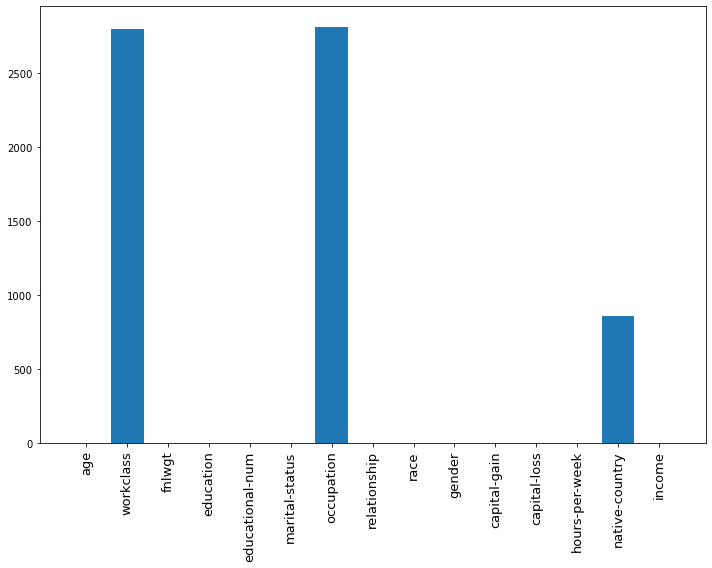

In [710]:
missing_va=[]
for i in data.columns:
    missing_va.append(data[i].isin(['?']).sum())
missing_va 
col_miss=data.columns
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(col_miss,missing_va)
ax.set_xticklabels(col_miss,fontsize=13,rotation = 90)
fig.tight_layout()
plt.show()
    

 workclass and occupation columns  conatin  more than 2500 missing values

In [711]:
precent_incom1=((data['income']=='<=50K')).sum()*100/len(data)
print(round(precent_incom1),'%')

76 %


the income of about 76 % is <= 50k

In [712]:
precent_incom2=((data['income']=='>50K')).sum()*100/len(data)
print(round(precent_incom2),'%')

24 %


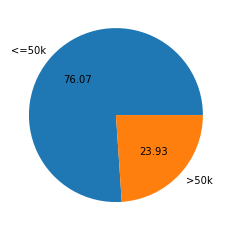

In [713]:
m = 0
n = 0
for i in data.income:
    if i == '<=50K':
        n += 1
    else:
        m += 1


plt.pie([n, m] , labels=['<=50k', '>50k'] ,autopct='%.2f')

plt.show()

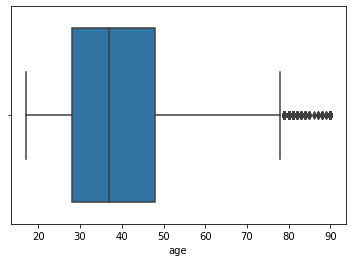

In [714]:
sns.boxplot(x=data["age"])# outliers
plt.show()

the average of the age is 38 years old  and the minimum is 17 years old

In [715]:
(data['age']>80).sum()

148

In [844]:
# remove the outliers from age column
#q3_age=data['age'].quantile(0.50)
#q1_age=data['age'].quantile(0.95)
#IQR_age=q3_age-q1_age
#print(IQR_age)

In [845]:
#lower_limit=q1_age-(IQR_age*1.5)
#print(lower_limit)
#upper_limit=q3_age+(IQR_age*1.5)
#print(upper_limit)

In [846]:
#data["age"] = np.where(data["age"] >q1_age, q3_age,data['age'])

#sns.boxplot(x=data['age'])

there are some people older than 80 years and they are still working

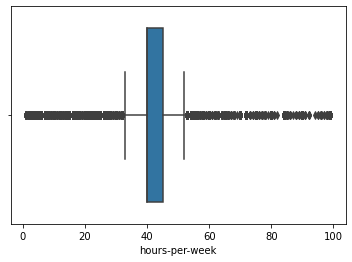

In [719]:
sns.boxplot(x=data["hours-per-week"])# outliers
plt.show()

some people are working more than 90 hours weakly!. outliers which we should handel them

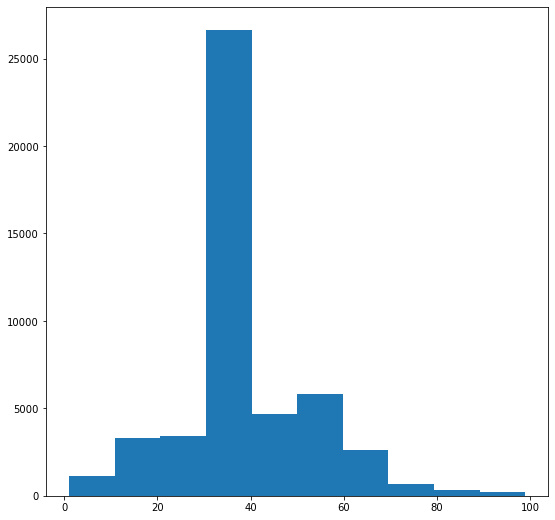

In [720]:
fig=plt.figure(figsize=(9,9))
plt.hist(x='hours-per-week',data=data)
plt.show()

 about 25000 people are working between 30 to 40 hours   and there less number that they are working more than 80 hours weakly

In [721]:
# you can see from the plot that there are some people are working more then 80 hours per week
data[data['hours-per-week']>=80].shape[0]

528

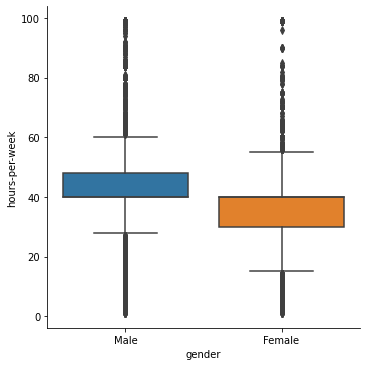

In [722]:
sns.catplot(x="gender", y="hours-per-week", kind="box", data=data)
plt.show()

The above plot show that the female are working less than the Male

In [723]:
data.groupby(['age','hours-per-week']).size()

age  hours-per-week
17   4                  4
     5                  9
     6                  9
     7                  5
     8                 19
                       ..
90   50                 4
     55                 1
     60                 2
     72                 1
     99                 2
Length: 3003, dtype: int64

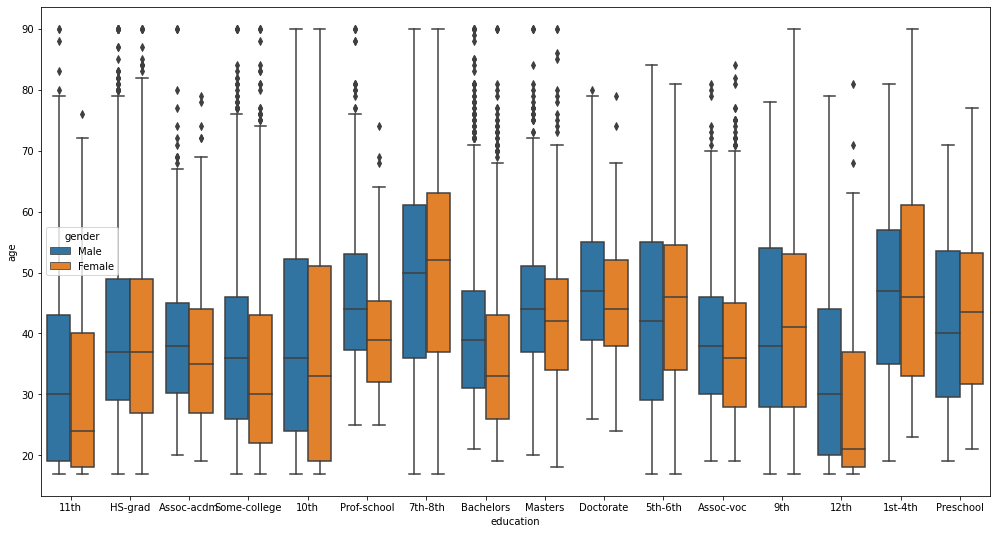

In [724]:
import  matplotlib.pyplot as plt
fig=plt.figure(figsize=(17,9))
sns.boxplot(x='education',y="age",hue='gender',data=data)
plt.show()

Female with Masters and Bachelors  degree as well as Doctorate are junger than the male

In [725]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [726]:
# we have in the column native-countary name of countary by the name ?  we should replace it 
sum(data['native-country']=='?')

857

In [727]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

About 43832 of the person come from USA becuase the dataset was taken from USA

we will replace '?' by Unites-States

In [728]:
data['native-country'].replace('?','United-States',inplace=True )

In [729]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [730]:
data['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [731]:
data[(data['native-country']=='Germany') &(data['hours-per-week']>=60)].max()

age                           68
workclass              State-gov
fnlwgt                    606111
education           Some-college
educational-num               16
marital-status     Never-married
occupation                 Sales
relationship                Wife
race                       White
gender                      Male
capital-gain               15024
capital-loss                1887
hours-per-week                70
native-country           Germany
income                      >50K
dtype: object

In [732]:
data[(data['age']>80) &(data['hours-per-week']>=90)].max()

age                              90
workclass                   Private
fnlwgt                       311184
education                   Masters
educational-num                  14
marital-status              Widowed
occupation         Transport-moving
relationship              Unmarried
race                          White
gender                         Male
capital-gain                      0
capital-loss                      0
hours-per-week                   99
native-country        United-States
income                        <=50K
dtype: object

some of the people from USA are working more than 90 hours weakly and 
they are older than 80 years old surprise ! we should handel such these outliers

In [733]:
dattt=data[(data['age']>80) &(data['hours-per-week']>=80)].value_counts()
data_new=pd.DataFrame(dattt)
data_new

0
age workclass   fnlwgt education educational-num marital-status occupation       relationship  race  gender capital-gain capital-loss hours-per-week native-country income   
90  Private     90523  HS-grad   9               Widowed        Transport-moving Unmarried     White Male   0            0            99             United-States  <=50K   1
    Federal-gov 311184 Masters   14              Divorced       Prof-specialty   Not-in-family White Male   0            0            99             United-States  <=50K   1

In [734]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

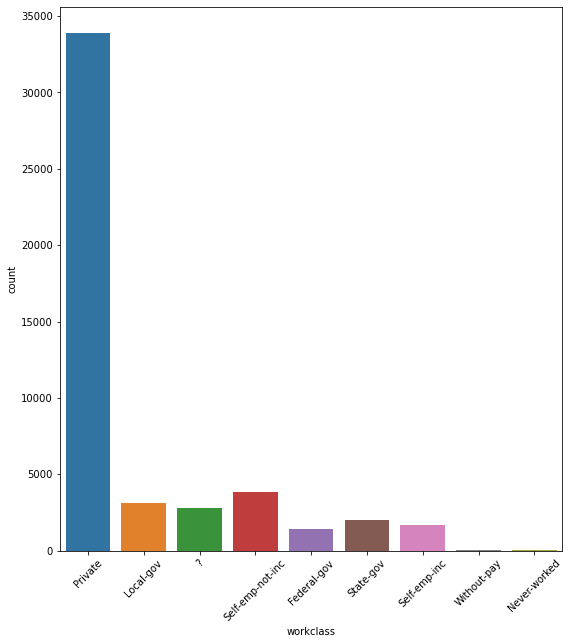

In [735]:
fig=plt.figure(figsize=(9,10))
sns.countplot(data['workclass'])
plt.xticks(rotation=45)
plt.show()

The most of people belongs to private sector

In [736]:
data['workclass'].value_counts().reset_index()

,index,workclass
0,Private,33906
1,Self-emp-not-inc,3862
2,Local-gov,3136
3,?,2799
4,State-gov,1981
5,Self-emp-inc,1695
6,Federal-gov,1432
7,Without-pay,21
8,Never-worked,10


In [737]:
data.groupby(['education','workclass']).size()

education     workclass       
10th          ?                    148
              Federal-gov           15
              Local-gov             52
              Never-worked           2
              Private             1022
                                  ... 
Some-college  Private             7535
              Self-emp-inc         332
              Self-emp-not-inc     724
              State-gov            490
              Without-pay            3
Length: 119, dtype: int64

we will replace '?' by 'Private'

In [738]:
data['workclass'].replace('?','Private',inplace=True)

In [739]:
data['workclass'].value_counts().reset_index()

,index,workclass
0,Private,36705
1,Self-emp-not-inc,3862
2,Local-gov,3136
3,State-gov,1981
4,Self-emp-inc,1695
5,Federal-gov,1432
6,Without-pay,21
7,Never-worked,10


In [740]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

the income is  categorical we need to convert it to 0 and 1

In [741]:
data['income'].replace(['>50K','<=50K'],[1,0],inplace=True)
data['income'].unique()

array([0, 1], dtype=int64)

In [742]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [743]:
data.groupby(['income','age']).size()

income  age
0       17      595
        18      862
        19     1050
        20     1112
        21     1090
               ... 
1       83        2
        84        1
        85        1
        88        1
        90       13
Length: 142, dtype: int64

 it is clear that educational-num and education are similar so we can drop one of them


In [744]:
data.drop(labels='educational-num',inplace=True, axis=1)

In [745]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [746]:
data['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

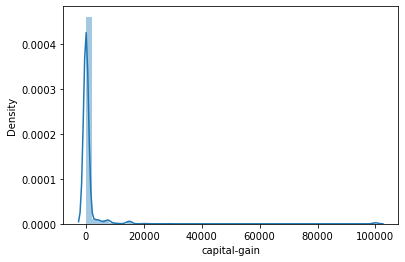

In [747]:
sns.distplot(data['capital-gain'])
plt.show()

most of the vaulues are zero

In [748]:
data['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

 most of the values are missing(46560  values are equal 0)

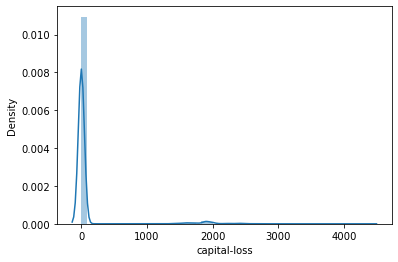

In [749]:
sns.distplot(data['capital-loss'])
plt.show()

the same for 'capital-loss'

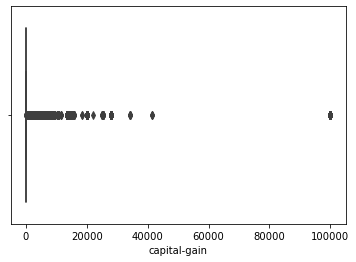

In [750]:
sns.boxplot(data['capital-gain'])
plt.show()

In [751]:
# combine the similar attribuitte

In [752]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [753]:
data.groupby(['marital-status','income']).size()

marital-status         income
Divorced               0          5962
                       1           671
Married-AF-spouse      0            23
                       1            14
Married-civ-spouse     0         12395
                       1          9984
Married-spouse-absent  0           570
                       1            58
Never-married          0         15384
                       1           733
Separated              0          1431
                       1            99
Widowed                0          1390
                       1           128
dtype: int64

In [754]:
data['marital-status'].replace('Never-married','Not-married',inplace=True)
data['marital-status'].replace('Married-spouse-absent','Not-married',inplace=True)
data['marital-status'].replace('Married-civ-spouse','married',inplace=True)
data['marital-status'].replace('Married-AF-spouse','married',inplace=True)
data['marital-status'].replace('Divorced','Separated',inplace=True)
data['marital-status'].replace('Separated','Separated',inplace=True)

In [755]:
data.groupby(['marital-status','income']).size()

marital-status  income
Not-married     0         15954
                1           791
Separated       0          7393
                1           770
Widowed         0          1390
                1           128
married         0         12418
                1          9998
dtype: int64

about 9998 married people earn more than 50k but 791 not married earn more than 
50k

In [756]:
data['marital-status'].unique()

array(['Not-married', 'married', 'Widowed', 'Separated'], dtype=object)

In [757]:
data['workclass'].replace('Self-emp-not-inc','Self-emp',inplace=True)
data['workclass'].replace('Self-emp-inc','Self-emp',inplace=True)
data['workclass'].replace('Local-gov','Gov',inplace=True)
data['workclass'].replace('Federal-gov','Gov',inplace=True)
data['workclass'].replace('State-gov','Gov',inplace=True)


In [758]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [759]:
data['occupation'].value_counts().reset_index()

,index,occupation
0,Prof-specialty,6172
1,Craft-repair,6112
2,Exec-managerial,6086
3,Adm-clerical,5611
4,Sales,5504
5,Other-service,4923
6,Machine-op-inspct,3022
7,?,2809
8,Transport-moving,2355
9,Handlers-cleaners,2072


In [760]:
data.groupby(['occupation','gender']).size()

occupation         gender
?                  Female    1273
                   Male      1536
Adm-clerical       Female    3769
                   Male      1842
Armed-Forces       Male        15
Craft-repair       Female     323
                   Male      5789
Exec-managerial    Female    1748
                   Male      4338
Farming-fishing    Female      95
                   Male      1395
Handlers-cleaners  Female     254
                   Male      1818
Machine-op-inspct  Female     804
                   Male      2218
Other-service      Female    2698
                   Male      2225
Priv-house-serv    Female     228
                   Male        14
Prof-specialty     Female    2242
                   Male      3930
Protective-serv    Female     122
                   Male       861
Sales              Female    1947
                   Male      3557
Tech-support       Female     562
                   Male       884
Transport-moving   Female     127
                   Mal

In [761]:
data['occupation'].value_counts().reset_index()

,index,occupation
0,Prof-specialty,6172
1,Craft-repair,6112
2,Exec-managerial,6086
3,Adm-clerical,5611
4,Sales,5504
5,Other-service,4923
6,Machine-op-inspct,3022
7,?,2809
8,Transport-moving,2355
9,Handlers-cleaners,2072


In [762]:
(data['occupation']=='?').sum()

2809

In [763]:
data['occupation'].replace(['?'],'Prof-specialty', inplace=True)

In [764]:
data['occupation'].value_counts().reset_index()

,index,occupation
0,Prof-specialty,8981
1,Craft-repair,6112
2,Exec-managerial,6086
3,Adm-clerical,5611
4,Sales,5504
5,Other-service,4923
6,Machine-op-inspct,3022
7,Transport-moving,2355
8,Handlers-cleaners,2072
9,Farming-fishing,1490


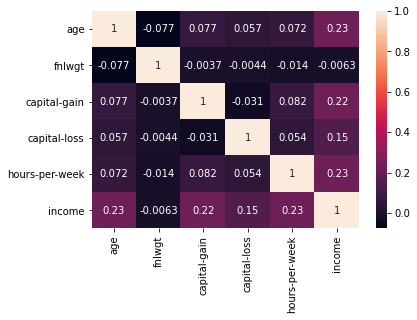

In [765]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   gender          48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [767]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

we will replace the zero values in 'Capital-gain' and 'capital-loss' by the mean

In [768]:
cap_gain_mean=data['capital-gain'].mean()
data['capital-gain'].replace(0,cap_gain_mean, inplace=True)

In [769]:
data['capital-gain'].value_counts().reset_index()

,index,capital-gain
0,1079.067626,44807
1,15024.000000,513
2,7688.000000,410
3,7298.000000,364
4,99999.000000,244
...,...,...
118,1731.000000,1
119,22040.000000,1
120,6612.000000,1
121,1639.000000,1


In [770]:
cap_loss_mean=data['capital-loss'].mean()
data['capital-loss'].replace(0,cap_loss_mean, inplace=True)
data['capital-loss'].value_counts().reset_index()

,index,capital-loss
0,87.502314,46560
1,1902.000000,304
2,1977.000000,253
3,1887.000000,233
4,2415.000000,72
...,...,...
94,2489.000000,1
95,1911.000000,1
96,2080.000000,1
97,2201.000000,1


In [771]:
#data['workclass'].replace('Self-emp-not-inc','Self-emp',inplace=True)
data['education'].value_counts().reset_index()

,index,education
0,HS-grad,15784
1,Some-college,10878
2,Bachelors,8025
3,Masters,2657
4,Assoc-voc,2061
5,11th,1812
6,Assoc-acdm,1601
7,10th,1389
8,7th-8th,955
9,Prof-school,834


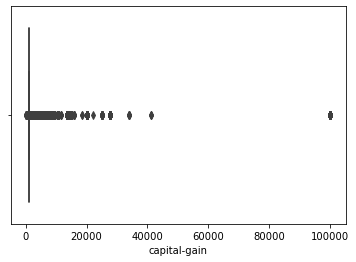

In [772]:
sns.boxplot(data['capital-gain'])
plt.show()

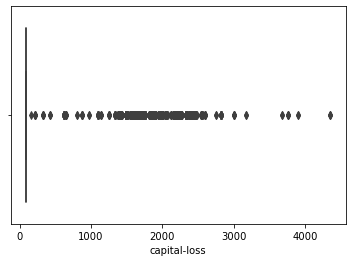

In [773]:
sns.boxplot(data['capital-loss'])
plt.show()

In [774]:
data.education = data.education.replace({'Preschool': 'School',
                                        '1st-4th': 'School',
                                        '5th-6th': 'School',
                                        '7th-8th': 'School',
                                        '9th': 'School',
                                        '10th': 'School',
                                        '11th': 'School',
                                        '12th': 'School',
                                        'Some-college': 'College',
                                        'Assoc-voc': 'College',
                                        'Assoc-acdm': 'College'})


In [775]:
data['relationship'].value_counts().reset_index()

,index,relationship
0,Husband,19716
1,Not-in-family,12583
2,Own-child,7581
3,Unmarried,5125
4,Wife,2331
5,Other-relative,1506


In [776]:
data.drop(labels='relationship',inplace=True,axis=1)

In [777]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [778]:
data['native-country'].value_counts().reset_index()

,index,native-country
0,United-States,44689
1,Mexico,951
2,Philippines,295
3,Germany,206
4,Puerto-Rico,184
5,Canada,182
6,El-Salvador,155
7,India,151
8,Cuba,138
9,England,127


In [779]:
data['native-country'].replace({'Germany': 'Europa',
                                        'France': 'Europa',
                                        'Greece': 'Europa',
                                        'Poland': 'Europa',
                                        'Italy': 'Europa',
                                        'Dominican-Republic': 'North America',
                                        'Cambodia': 'Asia',
                                        'Thailand': 'Asia',
                                        'Hong': 'Asia',
                                        'Taiwan': 'Asia',
                                        'Japan': 'Asia','China':'Asia','Philippines	':'Asia','India':'Asia'
                                          ,'Iran':'Asia','England':'Europa','Portugal':'Europa'
                               ,'Canada':'North America','El-Salvador':'North America','Cuba':'North America'
                              ,'Jamaica':'North America' ,'Guatemala': 'North America','Haiti':'North America'
                              ,'Nicaragua': 'North America','Ireland':'Europa','Hungary':'Europa',
                               'Scotland':'Europa','Holand-Netherlands':'Europa',
                               'Yugoslavia':'Europa','Honduras':'North America','Trinadad&Tobago':'South America'
                              ,'Ecuador':'North America','Vietnam':'Asia','Laos':'Asia'
                               ,'Peru':'South America','Puerto-Rico':'North America',
                               'Mexico':'North America','Philippines':'Asia',
                                'Outlying-US(Guam-USVI-etc)':'North America', 'United-States':'North America',
                               'South':'South America'}, 
                               inplace=True)

In [780]:
data['native-country'].value_counts().reset_index()

,index,native-country
0,North America,46808
1,Asia,981
2,Europa,780
3,South America,188
4,Columbia,85


In [781]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,Not-married,Machine-op-inspct,Black,Male,1079.067626,87.502314,40,North America,0
1,38,Private,89814,HS-grad,married,Farming-fishing,White,Male,1079.067626,87.502314,50,North America,0
2,28,Gov,336951,College,married,Protective-serv,White,Male,1079.067626,87.502314,40,North America,1
3,44,Private,160323,College,married,Machine-op-inspct,Black,Male,7688.000000,87.502314,40,North America,1
4,18,Private,103497,College,Not-married,Prof-specialty,White,Female,1079.067626,87.502314,30,North America,0


In [782]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [783]:
data.groupby(['race','income']).size()

race                income
Amer-Indian-Eskimo  0           415
                    1            55
Asian-Pac-Islander  0          1110
                    1           409
Black               0          4119
                    1           566
Other               0           356
                    1            50
White               0         31155
                    1         10607
dtype: int64

<AxesSubplot:>

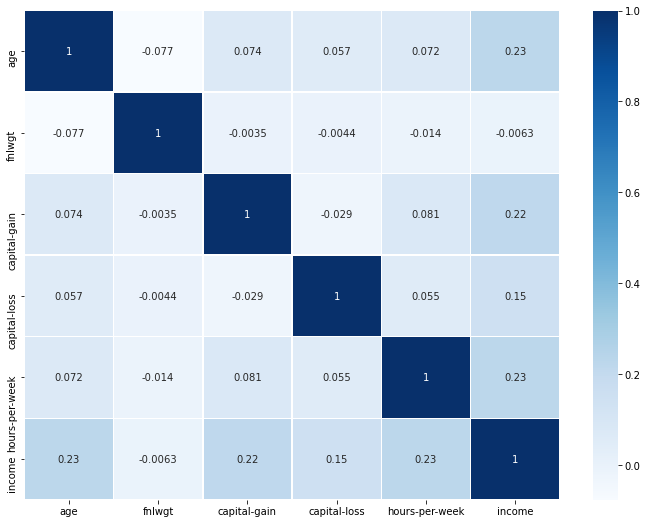

In [784]:
fig=plt.figure(figsize=(12,9))

sns.heatmap(data.corr(),annot=True,linewidths=.5, cmap="Blues")

In [785]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot= OneHotEncoder()
La_enc=LabelEncoder()

In [786]:
#X[:,6]=La_enc.fit_transform(X[:,6])
#X[:,2]=La_enc.fit_transform(X[:,2])
#X[:,2]

In [787]:
data.sample(100)

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38750,45,Gov,368947,Bachelors,Not-married,Protective-serv,Black,Female,1079.067626,87.502314,40,North America,0
28948,20,Private,230955,School,Not-married,Prof-specialty,Black,Female,1079.067626,87.502314,35,North America,0
42266,53,Gov,216931,School,married,Transport-moving,White,Male,1079.067626,87.502314,38,North America,0
37179,26,Gov,207537,HS-grad,Not-married,Adm-clerical,Black,Female,1079.067626,87.502314,40,North America,0
21636,35,Private,40135,College,married,Handlers-cleaners,White,Male,1079.067626,2042.000000,40,North America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35769,32,Private,328199,College,Separated,Exec-managerial,White,Female,1079.067626,87.502314,40,North America,0
31795,51,Gov,82504,College,married,Exec-managerial,White,Male,1079.067626,87.502314,40,North America,0
46546,32,Private,161075,HS-grad,Not-married,Craft-repair,White,Male,1079.067626,87.502314,40,North America,0
5926,27,Gov,187327,HS-grad,Separated,Protective-serv,White,Male,1079.067626,87.502314,45,North America,0


In [788]:
data['education'].unique()

array(['School', 'HS-grad', 'College', 'Prof-school', 'Bachelors',
       'Masters', 'Doctorate'], dtype=object)

In [789]:
#numerical_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)

In [790]:
#numerical_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

In [791]:
#numerical_columns.remove('income')

In [831]:
#numerical_columns

In [830]:
#for i in numerical_columns:
#    plt.figure(figsize=(5,4))
#    sns.boxplot(data[i])
#plt.show()    

In [832]:
#data.isin(['?']).sum()

In [795]:
#def outlier(col_name):
#    Q1,Q3 = np.percentile(col_name,[25,75])
#    IQR = Q3 - Q1
#    lower_bound = Q1-(1.5*IQR)
#    upper_bound = Q3+(1.5*IQR)
#    return lower_bound,upper_bound

In [796]:
#for i in numerical_columns:

#    o=outlier(data[i])
#    print('col_name :', i,o)

In [797]:
#new_col=numerical_columns.copy()

#print(new_col)

In [798]:
#new_col.remove('capital-loss')
#new_col

In [799]:
#new_col.remove('capital-gain')
#new_col

In [800]:
#for i in new_col:
#    lower_bound,upper_bound=outlier(data[i])
#    median=data[i].median()
#    data[i]=data[i].replace(to_replace=data[(data[i]<lower_bound)| (data[i]>upper_bound)][i],median)

In [801]:
categorical_cols=['gender','workclass','marital-status','occupation', 'race',
        'native-country','education']

Gender = pd.get_dummies(data['gender'],drop_first=True)
Work_Class = pd.get_dummies(data['workclass'],drop_first=True)
Material_Status = pd.get_dummies(data['marital-status'],drop_first=True)
Occupation = pd.get_dummies(data['occupation'],drop_first=True)
Race = pd.get_dummies(data['race'],drop_first=True)

Native_Countary = pd.get_dummies(data['native-country'],drop_first=True)
Education = pd.get_dummies(data['education'],drop_first=True)

data.drop(categorical_cols,axis=1,inplace=True)

In [802]:
data

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
0,25,226802,1079.067626,87.502314,40,0
1,38,89814,1079.067626,87.502314,50,0
2,28,336951,1079.067626,87.502314,40,1
3,44,160323,7688.000000,87.502314,40,1
4,18,103497,1079.067626,87.502314,30,0
...,...,...,...,...,...,...
48837,27,257302,1079.067626,87.502314,38,0
48838,40,154374,1079.067626,87.502314,40,1
48839,58,151910,1079.067626,87.502314,40,0
48840,22,201490,1079.067626,87.502314,20,0


In [803]:
#data['education']=La_enc.fit_transform(data['education'])

In [804]:
#data['gender']=La_enc.fit_transform(data['gender'])

In [805]:
#data.head()

In [806]:
data = pd.concat([data,Gender,Education,Work_Class,Material_Status,Occupation,Race,Native_Countary],axis=1)
data

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,Male,College,Doctorate,HS-grad,...,Tech-support,Transport-moving,Asian-Pac-Islander,Black,Other,White,Columbia,Europa,North America,South America
0,25,226802,1079.067626,87.502314,40,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,38,89814,1079.067626,87.502314,50,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,1079.067626,87.502314,40,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,44,160323,7688.000000,87.502314,40,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,18,103497,1079.067626,87.502314,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,1079.067626,87.502314,38,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
48838,40,154374,1079.067626,87.502314,40,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48839,58,151910,1079.067626,87.502314,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
48840,22,201490,1079.067626,87.502314,20,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [807]:
X=data.iloc[:, ~data.columns.isin(['income'])].values

In [808]:
print(X)

[[2.50000000e+01 2.26802000e+05 1.07906763e+03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.80000000e+01 8.98140000e+04 1.07906763e+03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.80000000e+01 3.36951000e+05 1.07906763e+03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [5.80000000e+01 1.51910000e+05 1.07906763e+03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.20000000e+01 2.01490000e+05 1.07906763e+03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.20000000e+01 2.87927000e+05 1.50240000e+04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [809]:
y=data.iloc[:,5].values
print(y)

[0 0 1 ... 0 0 1]


In [810]:
from sklearn.model_selection import train_test_split

In [811]:
X_train, X_test, y_train, y_test = train_test_split(X  , y, test_size=0.25 )

In [812]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
    
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [813]:
from sklearn.linear_model import LogisticRegression

In [814]:
logmodel = LogisticRegression(solver ='newton-cg')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [815]:
predictions = logmodel.predict(X_test)

In [816]:
from sklearn import metrics

In [817]:
from sklearn.metrics import r2_score
logistic_train_score=logmodel.score(X_train, y_train)
logistic_test_score=logmodel.score(X_test, y_test)
print('Train score: {}\nTest score: {}'.format(logistic_train_score,logistic_test_score))

Train score: 0.8516284021730228
Test score: 0.8483334698222914


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

In [818]:
from sklearn.metrics import classification_report

In [819]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9287
           1       0.73      0.59      0.65      2924

    accuracy                           0.85     12211
   macro avg       0.80      0.76      0.78     12211
weighted avg       0.84      0.85      0.84     12211



In [820]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [821]:
svc_train_score = svc.score(X_train, y_train)
svc_test_score = svc.score(X_test, y_test)

print('Train score: {}\nTest score: {}'.format(svc_train_score, svc_test_score))

Train score: 0.7958832682700445
Test score: 0.793628695438539


1-we remove the outliers to improve the result
2-we can  also apply other machine Learning model e.g. KKN  or Decision Tree     Classifierand check which one produce better result 
3- apply cross validation 
4- Hyperparmeter tune using grid search


In [823]:
numerical_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)

In [824]:
numerical_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

In [825]:
numerical_columns.remove('income')

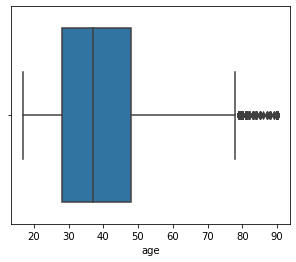

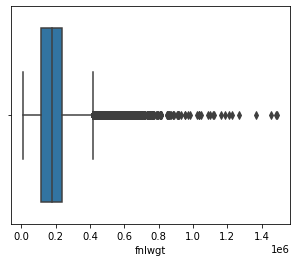

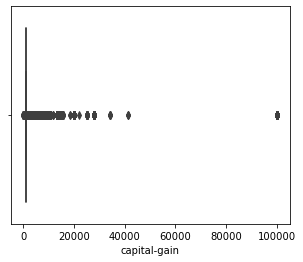

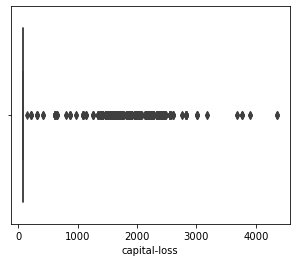

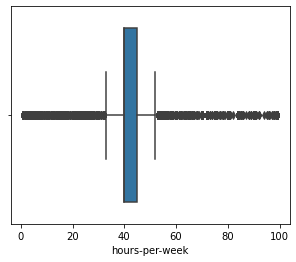

In [826]:
for i in numerical_columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(data[i])
plt.show()  

In [828]:
def outlier(col_name):
    Q1,Q3 = np.percentile(col_name,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [829]:
for i in numerical_columns:

    o=outlier(data[i])
    print('col_name :', i,o)

col_name : age (-2.0, 78.0)
col_name : fnlwgt (-62586.75, 417779.25)
col_name : capital-gain (1079.0676262233324, 1079.0676262233324)
col_name : capital-loss (87.50231358257237, 87.50231358257237)
col_name : hours-per-week (32.5, 52.5)
